In [15]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('cleanup.R')


Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'cleanup.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


Individual Planning Report (Minecraft Research Server)
By Payton Song

1. Data Description
For players.csv:
-Number of variables = 7
-Number of observations = 196
-Each row = a different player

For the following information it will be formatted as:
variable, type of variable, decription of variable

-experience, character, Shows player's experience level as Pro, Veteran, Regular, or Amateaur.
-subscribe, logical, Shows if a player is subscribed to the game's newsletter. TRUE means subscribed and FALSE means not subscribed.
-hashedEmail, character, Used to link session data with specfic player's emails. Protected for privacy.
-played_hours, numeric, The number of hours a player spent on the server.
-name, character, Player's name
-gender, character, Shows the gender of the player. Male, Female, Other, or Prefer not to say.
-Age, numeric, shows player's age.

Summary Statistics:
For the following information it will be formatted as:
variable, minimum, mean, median, maximum

-played_hours, 0.00, 5.85, 0.10, 223.10
-Age, 9.00, 21.14, 19.00, 58.00

Missing Data:
Age has 2 missing values for this data set.

For sessions.csv:
-Number of variables = 5
-Number of observations = 1535
-Each row = a session playing on the server

For the following information it will be formatted as:
variable, type of variable, decription of variable

-hashedEmail, character, Used to link session data with specfic player from players.csv. Protected for privacy.
-start_time, character, Date and time of the start of each session (dd/mm/yyyy hh:mm).
-end_time, character, Date and time of the end of each session (dd/mm/yyyy hh:mm).
-original_start_time, numeric, timestamp of the start of the first session
-original_end_time, numeric, timestamp of the end of the last session

Summary Statistics:
For the following information it will be formatted as:
variable, minimum, mean, maximum
-original_start_time, 1.712e+12, 1.719e+12, 1.727e+12
-original_end_time, 1.712e+12, 1.719e+12, 1.727e+12

Missing Data:
-original_end_time is missing 2 values.

Potential Issues accross both datasets:
-Missing data for Age and original_end_time
-Experience is self-reported and therefore may not be 100% accurate

2. Broad & Specific Questions
Broad Question (#2):
We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

Specific Question:
Can experience level predict the total amount of time spent playing on the server in the players.csv dataset?

The exploration of this question will support the broader analysis because it will reveal the specific relationship between experience level and total time on the server. Experience level helps identify what "kind" of player, and the total time on server is used to measure the amount of data from said "kind" of player. This information can then be used to further understand how to recruit players that will contribuite large amounts of data.

To answer this specifc question played_hours and experience will be used from the playesr.csv dataset.


3. Exploratory Data Analysis & Visualization
The first graph which is a Boxplot, shows the relationship between hours played and experience level. This graphs shows that typically most players did not play for a large amount of time. Pro players seem to have a higher minimum playing time, noteably in comparison to amateurs which have the widest spread amount of play time. The second graph shows the number of players within each experience level, this can explain why Pro players may seemingly have a higher average, because there was much smaller sample size in comparison to the Pro players. Overall this second graph reveals that the sample size is not the same for each category something important to note for predictive modelling.

4. Methods & Plan
In order to adress my specfic question, "Can experience level predict the total amount of time spent playing on the server in the players.csv dataset?", I plan to use the K-NN (nearest neighbour) predictive model. This will reveal if players with the same experience level tend to contribuite similar total hours played on the server. I plan to use the K-NN model because it does not make any assumptions about what the data will look like, this is especially helpful because the patterns within hours played are not linear to experience level. The K-NN model does not need many assumptions but instead I must make sure to scale my predictors and ensure there is enough data so it can properly predict. Some limitations would be that outlying points can negatively impact the prediction model, and also the fact that each experience level has different sample sizes can influence to predict certain levels over others. To tune the model I will use cross-validation to choose the ideal k value, I will also calcualte the RMSE and select the model with the lowest RMSE. I will begin by splitting my dataset (player.csv) into a training set and a testing test. Then to tune the model I will use v-fold cross validation on the training set and create a recipe to scale and center all my predictors.

5. GitHub Link

In [3]:
players<-read_csv("players.csv")
players

sessions<-read_csv("sessions.csv")
sessions

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [4]:
glimpse_p<-glimpse(players)
glimpse_p
glimpse_s<-glimpse(sessions)
glimpse_s
summary(players)
summary(sessions)
colSums(is.na(players))
colSums(is.na(sessions))

Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

In [11]:
players <- players |> 
  mutate(experience = as.factor(experience),
    gender = as.factor(gender) )
players

players_mean<-players |> 
  summarize( mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
    mean_age = round(mean(Age, na.rm = TRUE), 2))
players_mean

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


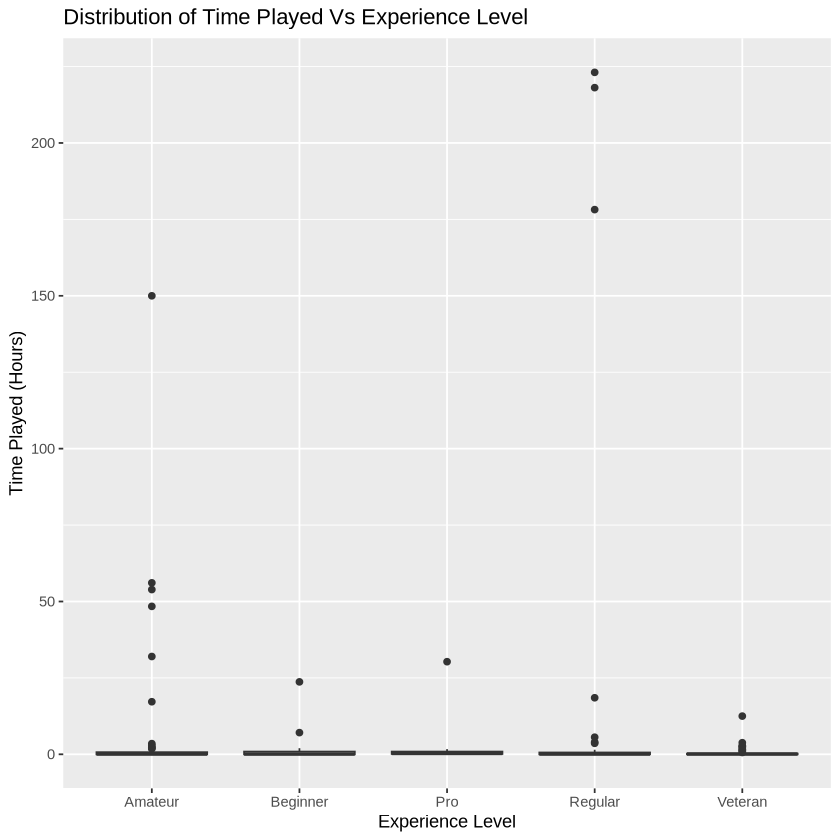

In [16]:
ggplot(players, aes(x = experience, y = played_hours)) +
  geom_boxplot() +
  labs(title = "Distribution of Time Played Vs Experience Level",
    x = "Experience Level",
    y = "Time Played (Hours)")

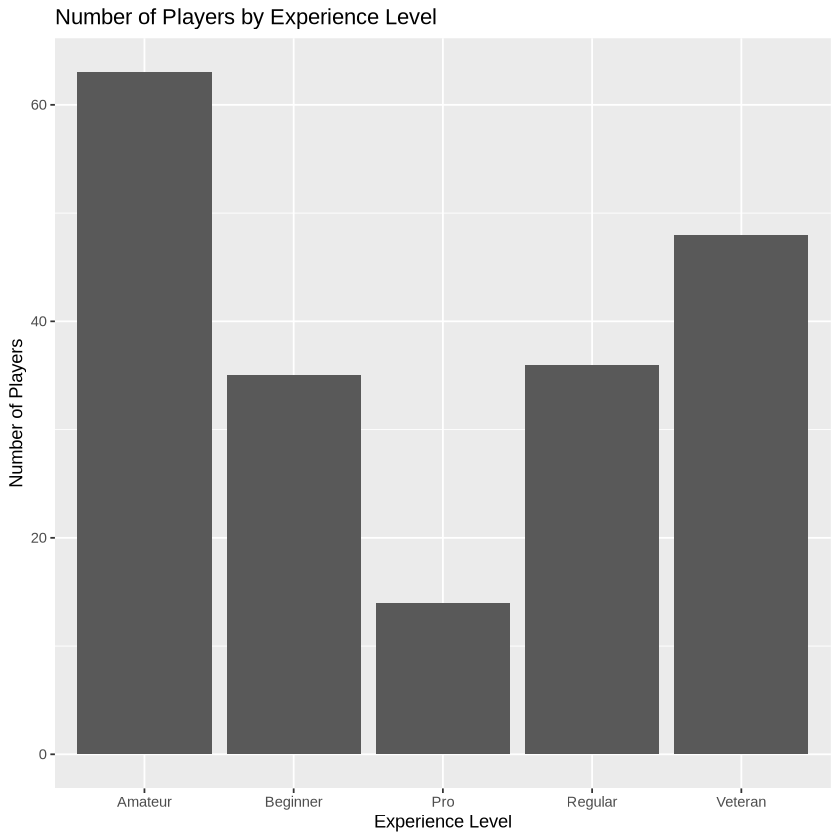

In [14]:
ggplot(players, aes(x = experience)) +
  geom_bar() +
  labs( title = "Number of Players Vs Experience Level",
    x = "Experience Level",
    y = "Number of Players")